# **Data Analysis Interview Challenge**

Part 1 - Exploratory Data Analysis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_json('logins.json')

In [0]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [0]:
quater_df = (pd.to_datetime(df['login_time'])
       .dt.floor('15T')
       .value_counts()
       .rename_axis('login_time')
       .reset_index(name='count'))
quater_df = quater_df.sort_values('login_time')

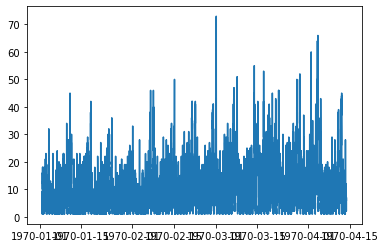

In [0]:
plt.plot(quater_df['login_time'], quater_df['count'])

In [0]:
month_df = quater_df.loc[(quater_df['login_time'] >= '1970-03-01') & (quater_df['login_time'] <= '1970-04-01')]

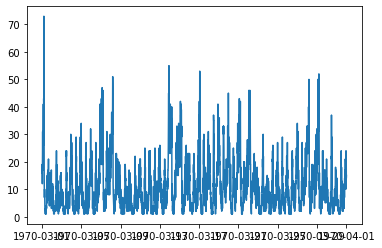

In [0]:
plt.plot(month_df['login_time'], month_df['count'])

In [0]:
week_df = quater_df.loc[(quater_df['login_time'] >= '1970-03-01') & (quater_df['login_time'] <= '1970-03-08')]

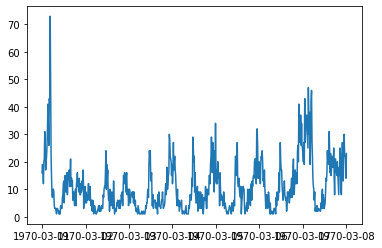

In [0]:
plt.plot(week_df['login_time'], week_df['count'])

In [0]:
print('Min:    {}'.format(quater_df['count'].min()))
print('Max:    {}'.format(quater_df['count'].max()))
print('Mean:   {}'.format(quater_df['count'].mean()))
print('Sum: {}'.format(quater_df.sum()))

Min:    1
Max:    73
Mean:   9.928792239633301
Sum: count    93142
dtype: int64


In [0]:
day_df = quater_df.loc[(quater_df['login_time'] >= '1970-03-01') & (quater_df['login_time'] <= '1970-03-02')]

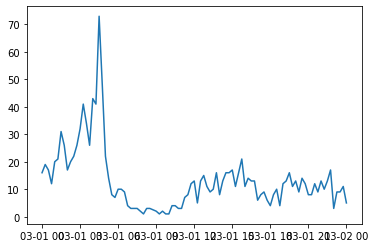

In [0]:
plt.plot(day_df['login_time'], day_df['count'])

In [0]:
daily_df = (pd.to_datetime(df['login_time'])
       .dt.floor('1D')
       .value_counts()
       .rename_axis('login_time')
       .reset_index(name='count'))
daily_df = daily_df.sort_values('login_time')

In [0]:
daily_df.head()

,login_time,count
102,1970-01-01,112
71,1970-01-02,681
54,1970-01-03,793
56,1970-01-04,788
100,1970-01-05,459


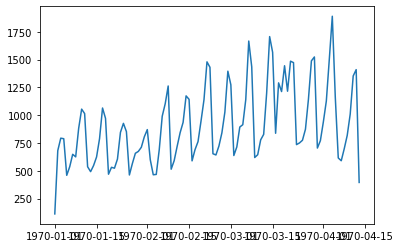

In [0]:
plt.plot(daily_df['login_time'], daily_df['count'])

In [0]:
print('Min:    {}'.format(daily_df['count'].min()))
print('Max:    {}'.format(daily_df['count'].max()))
print('Mean:   {}'.format(daily_df['count'].mean()))
print('Sum: {}'.format(daily_df.sum()))

Min:    112
Max:    1889
Mean:   904.2912621359224
Sum: count    93142
dtype: int64


Part 2 ‑ Experiment and metrics design

1. If there is an increase in the total number of driver partner travelling across the bridge that is porpotional to the number of reimbursement requests, it would indicate a success of the toll reimbursement program. I would choose this metric because a solo increase of drivers on the bridge could be caused by external factors but if the increase is linear to the amount reimbursement requests, it would be a clear indicator that the increase was directly caused by the reimbursement program.

2. I would compare existing data from the toll system with the data after the reimbursement program has been implemented.

> a) As a car passes a toll, its information is recorded by the tolling system. After the reimbursement program is in affect, we will continue to record the toll system data, but also incorperate the data from the reimbursement program.


>b) Compare proportional increase of the number of drivers to the number of reimbursement requests.

> c) I would create a line graph using the data from before and after the reimbursement program, highlighting any significant changes. I would also compare that to a graph of the number of reimbursement requests.

**Part 3 ‑ Predictive modeling**

1. To clean the data I first filled the the NaN values with 0. Next I created a new column called 'days_between_first_last_trip' which calculated the number of days between the 'signup_date' and the 'last_trip_date'.  Then I converted the City column into an integer with the get dummies function. Now I created the target series which is just a boolean value where if the 'trips_in_first_30_days' is greater than 1, it's set to true, or else it's false. Next I dropped the 'signup_date', 'last_trip_date', 'city', 'phone', and 'trips_in_first_30_days' columns. The code performing these steps are below.

In [0]:
import json
from datetime import date, datetime
import numpy as np

In [0]:
with open('ultimate_data_challenge.json') as json_file:
  data = json.load(json_file)
ultimate = pd.io.json.json_normalize(data)

In [0]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [0]:
ultimate = ultimate.fillna(0)
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [0]:
num_of_retained = ultimate[ultimate['trips_in_first_30_days'] > 1 ]['trips_in_first_30_days'].count()
total_users = ultimate['trips_in_first_30_days'].count()
print('{}% of observed users were retained.'.format(num_of_retained/total_users))

0.41004% of observed users were retained.


In [0]:
ultimate['last_trip_date'] = ultimate['last_trip_date'].apply(lambda y : datetime.strptime(y,'%Y-%m-%d'))
ultimate['signup_date'] = ultimate['signup_date'].apply(lambda y : datetime.strptime(y,'%Y-%m-%d'))
ultimate['days_between_first_last_trip'] = ultimate['last_trip_date'] - ultimate['signup_date']
ultimate['days_between_first_last_trip'] = ultimate['days_between_first_last_trip'] / np.timedelta64(1, 'D')
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                            50000 non-null object
trips_in_first_30_days          50000 non-null int64
signup_date                     50000 non-null datetime64[ns]
avg_rating_of_driver            50000 non-null float64
avg_surge                       50000 non-null float64
last_trip_date                  50000 non-null datetime64[ns]
phone                           50000 non-null object
surge_pct                       50000 non-null float64
ultimate_black_user             50000 non-null bool
weekday_pct                     50000 non-null float64
avg_dist                        50000 non-null float64
avg_rating_by_driver            50000 non-null float64
days_between_first_last_trip    50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 4.6+ MB


In [0]:
ultimate['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [0]:
encoded_city = pd.get_dummies(ultimate['city'], prefix='city')
ultimate = ultimate.join(encoded_city)
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
city                            50000 non-null object
trips_in_first_30_days          50000 non-null int64
signup_date                     50000 non-null datetime64[ns]
avg_rating_of_driver            50000 non-null float64
avg_surge                       50000 non-null float64
last_trip_date                  50000 non-null datetime64[ns]
phone                           50000 non-null object
surge_pct                       50000 non-null float64
ultimate_black_user             50000 non-null bool
weekday_pct                     50000 non-null float64
avg_dist                        50000 non-null float64
avg_rating_by_driver            50000 non-null float64
days_between_first_last_trip    50000 non-null float64
city_Astapor                    50000 non-null uint8
city_King's Landing             50000 non-null uint8
city_Winterfell                 50000 non-null uint8
dtypes: bo

In [0]:
X = ultimate.drop(['phone','city','signup_date', 'last_trip_date'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
trips_in_first_30_days          50000 non-null int64
avg_rating_of_driver            50000 non-null float64
avg_surge                       50000 non-null float64
surge_pct                       50000 non-null float64
ultimate_black_user             50000 non-null bool
weekday_pct                     50000 non-null float64
avg_dist                        50000 non-null float64
avg_rating_by_driver            50000 non-null float64
days_between_first_last_trip    50000 non-null float64
city_Astapor                    50000 non-null uint8
city_King's Landing             50000 non-null uint8
city_Winterfell                 50000 non-null uint8
dtypes: bool(1), float64(7), int64(1), uint8(3)
memory usage: 3.2 MB


In [0]:
target = X['trips_in_first_30_days'] > 1 
X = X.drop(['trips_in_first_30_days'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=123)

Score: 0.62224


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


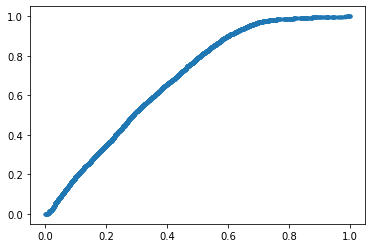

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
print('Score: {}'.format(clf.score(X_test, y_test)))
lr_probs = clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

Score: 0.72592


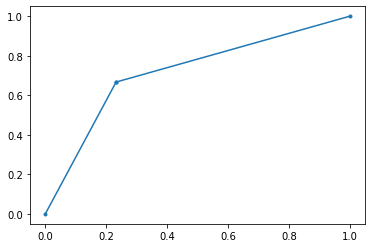

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print('Score: {}'.format(clf.score(X_test, y_test)))
lr_probs = clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

Score: 0.78312


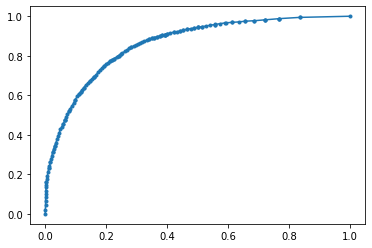

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
print('Score: {}'.format(clf.score(X_test, y_test)))
lr_probs = clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

2. I built a prediction model by dividing the data into testing and training data with 25% of the data for testing. Next I tested the data on 3 different classification models. The random forest classifier provided the best results. The ROC curve was used to determine the performance of each model.

3. Using the insights from this model, Ultimate would be able to determine which users will likely be retained and which users may need extra incentives to be a returning customer.